## Model Analysis

In [25]:
# loading packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)

In [5]:
# reading in data

df = pd.read_csv('data/pre_processed_data_5_clusters_with_PIE.csv')

In [78]:
# reviewing cleaned dataframe
print(df.shape)
df.head()

(389, 77)


,Player,PIE_2018,PIE_2017,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,cluster_five_1,cluster_five_2,cluster_five_3,cluster_five_4
0,Aaron Gordon,10.9,0.599522,-1.141838,1.309109,-0.173463,-0.644696,0.749324,1.263600,1.283885,0.203858,1.099042,-0.567144,0.839688,0.782363,1.160474,0.082474,1.284137,1.498676,-0.289077,-0.517186,0.531658,0.066010,-1.366031,-0.212155,0.414067,-0.371244,0.096483,0.419543,1.052409,1.001736,-0.494928,0.924277,0.489732,-0.095633,0.470303,-0.453438,0.555441,0.260834,0.088749,-0.064828,0.867984,0.674124,-0.259852,1.297981,0.696523,-0.191937,-1.079370,0.784400,-0.129931,0.880296,-0.299786,1.892958,0.514053,1.237220,-0.397844,1.283978,0.104264,1.222654,0.318478,1.134101,0.557654,0.799380,-0.543979,0.425220,-0.257629,-0.053253,0.399981,1.015231,-0.325281,-0.387679,1.066946,0.514631,-0.452034,-0.309475,-0.528777,-0.460259
1,Abdel Nader,6.6,-2.108971,-0.507239,-1.370192,-0.655630,0.284558,-0.998337,-1.406031,-1.539799,0.332523,-1.028178,-1.393695,-0.688977,-1.097853,-0.602416,-1.429079,-1.546621,-0.978165,-0.289077,-0.782997,-0.395047,0.469312,1.313518,0.755544,-0.713131,0.729937,-0.893138,0.109908,-1.339807,1.134127,0.033494,-1.544720,-1.309731,-0.793954,-1.195789,0.169218,-0.977220,-0.786824,-0.182312,0.226036,-1.039099,-1.167553,-0.858718,-1.481704,-2.639338,-0.834231,-1.079370,-1.461559,-1.048082,-1.322837,-2.098175,-1.276536,-0.405605,-1.844887,-2.060737,-1.548192,0.027315,-1.301127,0.279941,-1.232317,1.226359,-1.078475,1.208196,0.186802,-1.334113,-0.676263,-0.393052,-0.346562,-1.616033,-1.748715,-0.360054,0.514631,2.212225,-0.309475,-0.528777,-0.460259
2,Al Horford,13.4,1.166145,1.316686,1.145066,0.605933,1.143698,-0.247081,0.670153,0.793366,0.870873,0.102390,0.212669,0.839688,-0.142267,1.564640,0.082474,1.133714,1.455135,-0.289077,1.644977,0.862278,1.047955,-1.510339,-0.175059,0.376987,0.454340,0.800622,0.450934,0.644586,0.944678,-0.274738,1.381629,0.974197,0.433107,1.305268,0.659929,1.530421,0.130764,0.740880,-0.732346,-1.039099,1.868931,1.482431,0.450128,0.783120,1.597877,0.315278,1.056767,-0.037210,0.623365,0.750883,1.012746,-0.405605,0.416510,-0.918397,0.606531,-0.949062,1.083286,-0.906025,0.868527,0.776951,0.532085,-1.586700,-1.060358,1.361408,1.116462,0.489615,0.840726,0.533201,0.383563,0.090018,-0.992504,-0.452034,-0.309475,-0.528777,2.172691
3,Al-Farouq Aminu,9.7,-0.070697,0.288108,0.943945,0.428992,0.720924,0.042967,0.105758,0.006735,0.439912,-0.372274,-0.214675,-0.003560,0.971477,0.769501,0.238268,0.527274,1.251245,-0.289077,1.136596,0.531658,0.066010,-0.925316,0.660380,-0.591655,0.140443,1.310221,0.069715,1.052409,1.144879,-0.552009,-0.032652,-0.342148,-0.095633,-0.223917,-0.555864,1.088569,1.145780,0.054940,-0.028951,-1.039099,1.031839,1.006478,-0.238987,-0.185822,-0.191937,-0.771416,-1.461559,-1.243561,-1.322837,-1.376140,0.644638,-1.921448,1.237220,0.619465,1.116125,-0.518985,1.361144,0.552206,0.957778,0.359065,0.442925,0.279922,-0.470984,0.958301,-1.276797,0.430470,1.104013,-0.278114,-0.517965,-0.767332,-0.367594,-0.452034,-0.309475,1.891156,-0.460259
4,Alan Williams,27.4,-0.101249,-0.223522,-0.996731,-1.904672,-2.098239,-1.900675,-1.082978,-1.192006,-2.124130,-0.003908,-0.822873,0.400138,0.782363,-0.602416,1.187900,-0.502385,-0.978165,-0.289077,0.139842,0.212055,1.775629,1

#### Reviewing Model Scores of All Predictive Models 

In [77]:
pd.read_csv('data/model_scores_df.csv', index_col = 0)

,RMSE,R-Squared,Hyperparameters
XGBoost,2.20,0.53,Default
Random_Forest,2.26,0.50,Default
Elastic_Net,2.28,0.49,Bayesian Optimization
Elastic_Net,2.36,0.45,Grid Search
Elastic_Net,2.36,0.45,Grid Search
Lasso,2.36,0.45,Grid Search
Ridge,2.36,0.45,Grid Search
Elastic_Net,2.38,0.44,Random Grid Search
SmOLS,3.02,0.10,Default


### Best Model - Elastic Net with Hyperparameters Tuned with Bayesian Optimziation
#### - Even though XGBoost and Random Forest slightly outperformed Elastic Net with Bayesian Optimization, I will continue my analysis with Elastic Net given that the model's coeficcients are interpretable. Before final analysis, I will demonstrate how this model was trained in the previous notebook.

In [9]:
# training Elastic Net with Bayesian Optimization

# first creating train-test-split

X = df.drop(['Player','PIE_2018'], axis=1)
y = df.PIE_2018
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
# Defining scoring function to pass into Bayesian Optimizer

def elastic_func(**params):
        
    random_elastic = ElasticNet(alpha = params['alpha'], l1_ratio = params['l1_ratio'], random_state=33)   
    random_elastic.fit(X_train, y_train)
    e_preds = random_elastic.predict(X_test)
    random_elastic_grid_score = mean_squared_error(y_test, e_preds) 
    # print("RMSE: ", random_elastic_grid_scores[0] ** 0.5)
    
    return random_elastic_grid_score

In [23]:
# Defining ranges of hyperparameters for Bayesian Optimizaton

params = {'l1_ratio': (0.0001, 1),
              'alpha': (0.0001, 1)}

bo = BayesianOptimization(elastic_func, params, random_state=33)
bo.maximize(init_points=5, n_iter=10, acq='ucb', kappa=2)

elastic_bayes_df = pd.DataFrame(bo.res).sort_values(by='target')
best_elastic_bayes_params = elastic_bayes_df.iloc[0][1]

print("Best paramaters for Elastic Net with Bayesian Optimization: \n",  best_elastic_bayes_params)

|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
|  1        |  5.518    |  0.2486   |  0.45     |
|  2        |  5.413    |  0.411    |  0.2604   |
|  3        |  5.322    |  0.8704   |  0.1851   |
|  4        |  6.826    |  0.01976  |  0.9533   |
|  5        |  5.246    |  0.6805   |  0.4866   |
|  6        |  5.293    |  0.2233   |  1.0      |
|  7        |  6.802    |  0.04892  |  0.207    |
|  8        |  5.322    |  0.5231   |  0.2522   |
|  9        |  6.708    |  0.02785  |  0.9533   |
|  10       |  8.9      |  0.0001   |  1.0      |
|  11       |  6.789    |  0.01949  |  0.9968   |
|  12       |  8.383    |  0.00117  |  0.9797   |
|  13       |  5.655    |  0.1521   |  0.7644   |
|  14       |  7.022    |  0.01843  |  0.2368   |
|  15       |  5.193    |  0.3313   |  0.719    |
Best paramaters for Elastic Net with Bayesian Optimization: 
 {'alpha': 0.3312802512433686, 'l1_ratio': 0.7189606747335592}


### Best Model Results: RMSE and R^2 Score

In [27]:
bayes = ElasticNet(alpha = best_elastic_bayes_params['alpha'], 
                   l1_ratio=best_elastic_bayes_params['l1_ratio'], 
                   random_state=33)

bayes.fit(X_train, y_train)
y_preds = bayes.predict(X_test)

bayes_elastic_scores = mean_squared_error(y_test, y_preds) ** 0.5, r2_score(y_test, y_preds)

print("RMSE: ", bayes_elastic_scores[0])
print("R^2 score: ", bayes_elastic_scores[1])

RMSE:  2.2788095821310805
R^2 score:  0.49068233074218837


### Coefficients of the Model

In [46]:
print('Most important model coefficients:')

coef_df = pd.DataFrame(data = abs(bayes.coef_), index= X.columns, columns=['Absolute Value of Model Coefficients'])
coef_df['+/- Corr.'] = bayes.coef_
coef_df['+/- Corr.'] = coef_df['+/- Corr.'].apply(lambda x: '+' if x > 0 else '-')

coef_df = coef_df.sort_values(by='Absolute Value of Model Coefficients', ascending=False)

coef_df.head(10)

Most important model coefficients:


,Absolute Value of Model Coefficients,+/- Corr.
PIE_2017,1.074437,+
DREB%,0.531392,+
USG%,0.507683,+
FGM_5_9ft,0.402081,+
L,0.312532,-
FG%_und_5ft,0.278564,+
OPP_FG%_und_5ft,0.249301,-
FG%_10_14ft,0.210631,-
DD2,0.207227,+
cluster_five_4,0.153731,+


### Analysis of Coefficients 
#### Let's investigate the coefficients of this model. Below are the  the top ten most impactful variables for predicting the following season's PIE metric. Here are some key takeaways:


- It follows that the previous season's PIE value would be the most informative statistic
- Somewhat suprisingly defensive rebounding is the second most predictive stat
- USG% makes sense, given that it is an aggregate of the player's shooting as a porportion of the team's shooting.
- Not too suprisingly that being on a losing team contributes to less playing time the following season.
- The one coefficient that seems out of place is that field goal percentage between 10-14 feet is negatively correlated with their PIE value. Perhaps this average mid range shot is not highly valued in the league, but it is more probable that the model is accounting for a regression towards the mean.

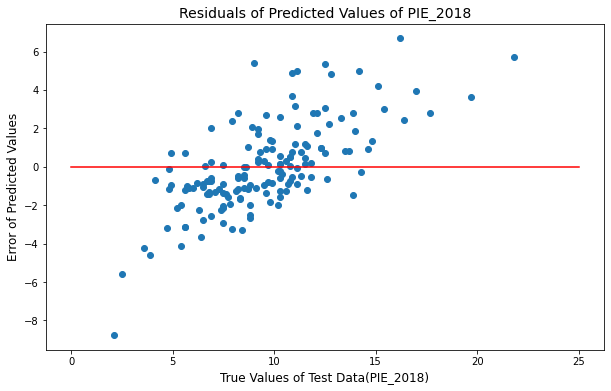

In [57]:
### Below is a graph of the model's true values compared with the errors of the predictions.
### We can see a few significant outliers


# Plot the predictions
# Build a scatterplot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test - y_preds)
# Add a line for perfect correlation
plt.plot([0,25],[0,0],c='r')
# Label it nicely
plt.xlabel('True Values of Test Data(PIE_2018)', fontsize=12)
plt.ylabel('Error of Predicted Values', fontsize=12)
plt.title('Residuals of Predicted Values of PIE_2018', fontsize=14)
plt.show()

#### From this graph we can see below a PIE score of approximately 12, the model is generally under estimating and overestimating for PIE scores above 12. I attribute this to the model over estimating a regression towards the mean, which is an accurate general trend but not encompassing individual player growth.

#### Analysis: This graph illustrates that the model is essentially predicting a regression towards the mean, which is an observable statistical phenomenom, but does not account for individual player growth over time,  which I was hoping my model could capture.

## Analysis of Model Predictions on Subsets of the League

- Players the Model predicted most accurately
- Players the Model predicted least accurately
- Look at players with low minutes (or young) (and make observes)
- Accuracy on Players Traded vs not Traded
____

In [58]:
# importing model results dataframe from previous notebook

model_results_df = pd.read_csv('data/best_model_results_analysis.csv')

### Investigating Worst Player Predictions (where did the model go wrong?) 
#### (include graph, maybe concat all these into one joint bar graph?

In [79]:
model_results_df.shape

(156, 10)

In [84]:
#Looking at the 10 worst player predictions
worst10_pred_df = model_results_df.sort_values(by='pred_error', ascending=False)[:10]
worst10_pred_df

,Player,PIE_2017,PIE_2018,predictions,pred_error,AGE,MIN_2017,true_change_in_PIE,TEAM,Team_2018
101,Wade Baldwin IV,9.4,2.1,10.853564,8.753564,22,11.5,-7.3,POR,POR
21,JaKarr Sampson,8.7,16.2,9.521468,6.678532,25,15.6,7.5,SAC,CHI
111,Giannis Antetokounmpo,18.6,21.8,16.064312,5.735688,23,36.7,3.2,MIL,MIL
95,Andrew Harrison,8.3,2.5,8.065118,5.565118,23,23.7,-5.8,MEM,NOP
135,Quincy Pondexter,1.9,9.0,3.619072,5.380928,30,8.5,7.1,CHI,SAS
142,Ekpe Udoh,7.2,12.5,7.159663,5.340337,31,12.9,5.3,UTA,UTA
102,TJ Leaf,6.1,11.1,6.101988,4.998012,21,8.7,5.0,IND,IND
5,Joakim Noah,11.4,14.2,9.228981,4.971019,33,5.7,2.8,NYK,MEM
106,Walt Lemon Jr.,3.0,10.9,6.008435,4.891565,25,7.0,7.9,NOP,CHI
42,Derrick Rose,6.8,12.8,7.956106,4.843894,29,16.8,6.0,MIN,MIN


#### Observation: The model is over generalizing a regression towards the mean for these players.

### Models Top Ten Most Accurate Predictions

In [85]:
#Looking at the 10 best player predictions
best10_pred_df = model_results_df.sort_values(by='pred_error', ascending=True)[:10]
best10_pred_df

,Player,PIE_2017,PIE_2018,predictions,pred_error,AGE,MIN_2017,true_change_in_PIE,TEAM,Team_2018
100,Meyers Leonard,12.0,10.8,10.781333,0.018667,26,7.7,-1.2,POR,POR
150,Dragan Bender,5.8,6.6,6.580980,0.019020,20,25.2,0.8,PHX,PHX
68,Tyson Chandler,10.8,8.5,8.526546,0.026546,35,25.0,-2.3,PHX,LAL
13,Cristiano Felicio,8.2,8.6,8.630109,0.030109,25,17.8,0.4,CHI,CHI
69,Jabari Parker,11.1,11.1,11.167447,0.067447,23,24.0,0.0,MIL,WAS
61,Marco Belinelli,9.3,7.5,7.422094,0.077906,32,24.3,-1.8,PHI,SAS
22,Darius Miller,5.6,4.8,4.898843,0.098843,28,23.7,-0.8,NOP,NOP
32,T.J. McConnell,9.9,9.7,9.600073,0.099927,26,22.5,-0.2,PHI,PHI
134,Jahlil Okafor,10.5,11.5,11.368922,0.131078,22,12.6,1.0,BKN,NOP
85,Klay Thompson,10.3,10.3,10.160121,0.139879,28,34.3,0.0,GSW,GSW


#### Observation: A common trend between these players is that they had a much lower change in PIE between seasons.

### Building a dataframe just of Model accuracy on specific subsets of the league

In [ ]:
 # # players that played under 10 minutes a game
# role_players_df = model_results_df.loc[model_results_df.MIN_2017 < 10].sort_values(by='pred_error', ascending=False)

# # players who showed significant improvement in 2018(filtering for players with a PIE increase by +3)
# improved_df = model_results_df[model_results_df.true_change_in_PIE > 3]\
#                                     .sort_values(by='pred_error', ascending=False)

# # young players (under 25)
# young_players_df = model_results_df[model_results_df.AGE < 25]\
#                                     .sort_values(by='pred_error', ascending=False)

# # Filtered for players who changed teams
# traded_players_df = model_results_df[model_results_df.TEAM != model_results_df.Team_2018]\
#                                     .sort_values(by='pred_error', ascending=True)
# # Filtered for players who did not change teams
# untraded_players_df = model_results_df[model_results_df.TEAM == model_results_df.Team_2018]\
#                                     .sort_values(by='pred_error', ascending=True)

In [129]:
# Creating Dataframe of RMSE of model accuracy on each subset of NBA players

subset_scores_df = pd.DataFrame(columns=['RMSE'])
subset_scores_df.loc['all_players']= model_results_df.pred_error.mean() ** 0.5
subset_scores_df.loc['role_players']= model_results_df.loc[model_results_df.MIN_2017 < 10].pred_error.mean()  ** 0.5
subset_scores_df.loc['improved_players']= model_results_df[model_results_df.true_change_in_PIE > 3].pred_error.mean()  ** 0.5
subset_scores_df.loc['young_players']= model_results_df[model_results_df.AGE < 25].pred_error.mean() ** 0.5
subset_scores_df.loc['changed_teams']= model_results_df[model_results_df.TEAM != model_results_df.Team_2018].pred_error.mean() ** 0.5
subset_scores_df.loc['same_teams']= model_results_df[model_results_df.TEAM == model_results_df.Team_2018].pred_error.mean() ** 0.5
subset_scores_df.loc['under_performers']= model_results_df.loc[model_results_df.PIE_2017 < 7].pred_error.mean()  ** 0.5
subset_scores_df.sort_values(by='RMSE', ascending=False, inplace=True)
subset_scores_df


,RMSE
improved_players,1.918389
role_players,1.520182
under_performers,1.395751
young_players,1.356611
changed_teams,1.345384
all_players,1.311923
same_teams,1.286832


<AxesSubplot:>

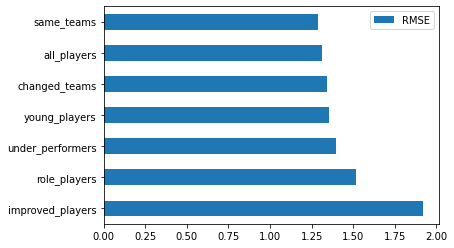

In [130]:
subset_scores_df.plot.barh()

#### Analysis: From this chart we can see that the model performed the most accurately on players who did not change teams between the 2017 and 2018 season. The model performed well on young players but again in this analyis, the model did not perform as well with players who showed greater improvement between seasons.

Conclusion

Next Steps?